## **Import Libraries**

In [1]:
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
import random
import magic
from keras_preprocessing.image import ImageDataGenerator

## **Exploratory Data Analysis**

In [2]:
root_path = r'D:\Datasets'
source_path = os.path.join(root_path,
                           'Rice_Image_Dataset')

rice_dataset = {}

for label in os.listdir(source_path):
    rice_dataset[label] = [file for file in os.listdir(os.path.join(source_path, label))]

In [3]:
print(
    f'amount of data\t\t: {sum([len(files) for files in rice_dataset.values()])}',
    f'amount of label\t\t: {len(rice_dataset.keys())}',
    sep = '\n' + '-'*60 + '\n'
)

print('-'*60)

for key, value in rice_dataset.items():
    print(f'amount of {key.lower()}\t: {len(value)}')
    print('-'*60)

amount of data		: 75000
------------------------------------------------------------
amount of label		: 5
------------------------------------------------------------
amount of arborio	: 15000
------------------------------------------------------------
amount of basmati	: 15000
------------------------------------------------------------
amount of ipsala	: 15000
------------------------------------------------------------
amount of jasmine	: 15000
------------------------------------------------------------
amount of karacadag	: 15000
------------------------------------------------------------


In [4]:
random_label = list(rice_dataset.keys())[random.randrange(len(list(rice_dataset.keys())))]

image_resolution = magic.from_file(os.path.join(root_path,
                                                source_path,
                                                random_label,
                                                rice_dataset[random_label][random.randrange(len(rice_dataset[random_label]))])).split(',')[7].strip()

print(f'Image Resolution: {image_resolution} pixels')

Image Resolution: 250x250 pixels


## **Data Visualization**

### Bar Chart

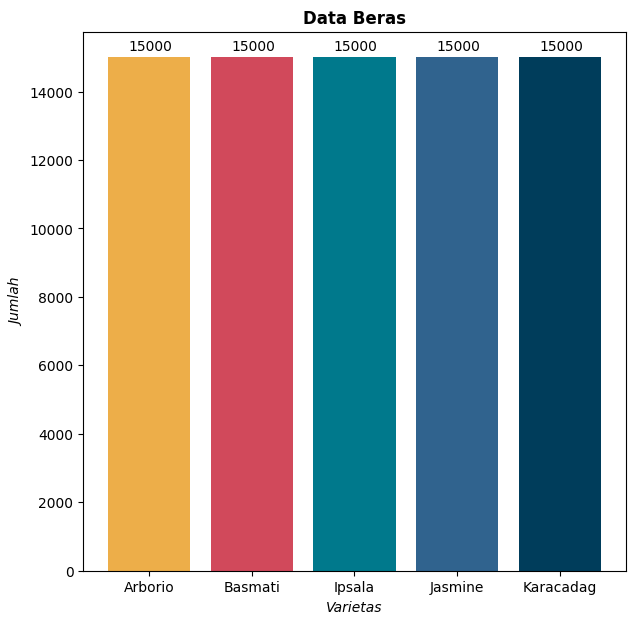

In [5]:
plt.figure(figsize = (7,7))
plt.title('Data Beras', fontweight='bold')
plt.xlabel('Varietas', fontstyle='oblique')
plt.ylabel('Jumlah', fontstyle='oblique')
plt.bar(rice_dataset.keys(),
        [len(files) for files in rice_dataset.values()],
        color=['#edae49', '#d1495b', '#00798c', '#30638e', '#003d5b'])

for index, value in enumerate([len(files) for files in rice_dataset.values()]):
    plt.text(index - .2, value + 200, str(value))

plt.show()

### Pie Chart

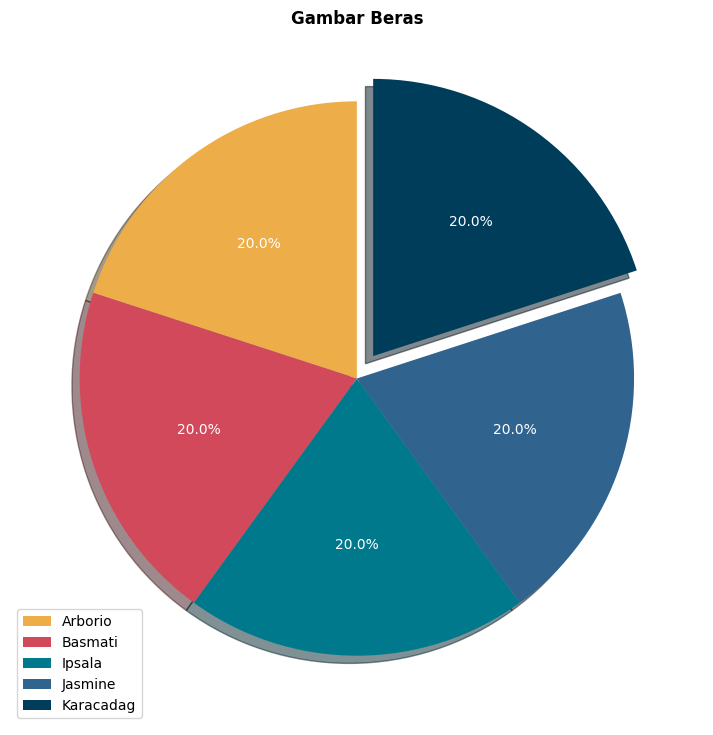

In [6]:
plt.figure(figsize = (9,9))
plt.pie([len(files) for files in rice_dataset.values()],
        labels = rice_dataset.keys(),
        startangle = 90,
        autopct = '%.1f%%',
        explode = [0, 0, 0, 0, 0.1],
        shadow = True,
        colors=['#edae49', '#d1495b', '#00798c', '#30638e', '#003d5b'],
        textprops={'color':"w"})
plt.title('Gambar Beras', fontweight='bold')
plt.legend()
plt.show()

### Image Sample

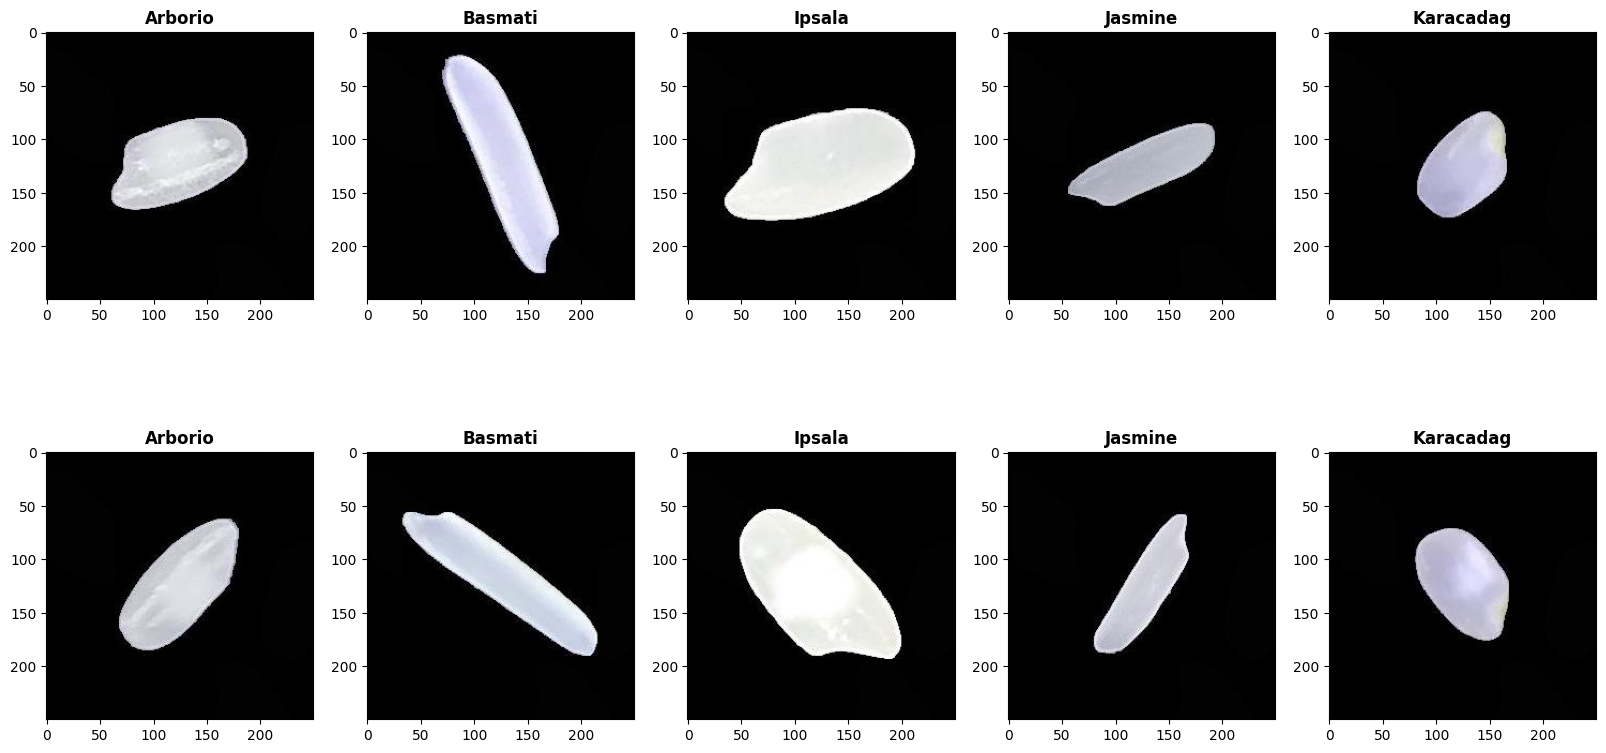

In [7]:
fig = plt.figure(figsize = (20, 10))

image_position = 0

for j in range(2):
    for index, folder in enumerate(rice_dataset.keys()):
        image_position += 1
        fig.add_subplot(2, 5, image_position)
        plt.title(folder, fontweight='bold')
        plt.imshow(img.imread(os.path.join(source_path, folder, rice_dataset[folder][random.randint(0,15000)])))

## **Split Dataset**

In [ ]:
target_path = os.path.join(root_path, 'Splitted_Rice_Image_Dataset')

### Create Folders

In [ ]:
if (os.path.isdir(os.path.join(target_path, 'train'))):
    print(f'path {os.path.join(target_path, "train")} already exists')
else:
    os.makedirs(os.path.join(target_path, 'train'))
    for label in rice_dataset.keys():
        os.makedirs(os.path.join(target_path, f'train/{label}'))

if (os.path.isdir(os.path.join(target_path, 'val'))):
    print(f'path {os.path.join(target_path, "val")} already exists')
else:
    os.makedirs(os.path.join(target_path, 'val'))
    for label in rice_dataset.keys():
        os.makedirs(os.path.join(target_path, f'val/{label}'))

if (os.path.isdir(os.path.join(target_path, 'test'))):
    print(f'path {os.path.join(target_path, "test")} already exists')
else:
    os.makedirs(os.path.join(target_path, 'test'))
    for label in rice_dataset.keys():
        os.makedirs(os.path.join(target_path, f'test/{label}'))

### Split Ratio

In [ ]:
# Shuffle file
for label in rice_dataset.keys():
    rice_dataset[label] = random.sample(rice_dataset[label], len(rice_dataset[label]))

file_train = {}; file_val = {}; file_test = {}

# train 90%, val 9%, test 1%
for label in rice_dataset.keys():
    file_train[label] = rice_dataset[label][:-1500]
    file_val[label] = rice_dataset[label][-1500:-150]
    file_test[label] = rice_dataset[label][-150:]

### Copy Files

In [ ]:
for label in file_train.keys():
    for data in file_train[label]:
        shutil.copyfile(
            os.path.join(source_path, label, data),
            os.path.join(target_path, f'train/{label}', data)
        )

    for data in file_val[label]:
        shutil.copyfile(
            os.path.join(source_path, label, data),
            os.path.join(target_path, f'val/{label}', data)
        )

    for data in file_test[label]:
        shutil.copyfile(
            os.path.join(source_path, label, data),
            os.path.join(target_path, f'test/{label}', data)
        )

## **Normalize Image Pixels**

In [8]:
train_path = r'D:\Datasets\Splitted_Rice_Image_Dataset\train'
val_path = r'D:\Datasets\Splitted_Rice_Image_Dataset\val'
test_path = r'D:\Datasets\Splitted_Rice_Image_Dataset\test'

In [9]:
image_data_generator = ImageDataGenerator(
    rescale=1./255
)

In [10]:
train_generator = image_data_generator.flow_from_directory(
    train_path,
    target_size=(100, 100),
    color_mode='grayscale',
    batch_size=128,
    shuffle=True,
    class_mode='categorical'
)

val_generator = image_data_generator.flow_from_directory(
    val_path,
    target_size=(100, 100),
    color_mode='grayscale',
    batch_size=128,
    shuffle=True,
    class_mode='categorical'
)

test_generator = image_data_generator.flow_from_directory(
    test_path,
    target_size=(100, 100),
    color_mode='grayscale',
    batch_size=128,
    shuffle=True,
    class_mode='categorical'
)

Found 67500 images belonging to 5 classes.
Found 6750 images belonging to 5 classes.
Found 750 images belonging to 5 classes.


## **Model Architecture**

## **Model Configuration**

## **Train Model**

## **Evaluate Model**

## **Model Prediction**

## **Model Visualization**

### Accuracy

### Loss